# Tugas Statistika Probabilitas

### Import Datasets and Library needed

di suruh nyari mean, median, modus, range, IQR, varian, standar deviasi, skewness, kurtosis dari data di program pakek python

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv('data/datasets.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            121 non-null    int64  
 1   Curah Hujan (mm)   121 non-null    float64
 2   Penjualan A (pcs)  121 non-null    int64  
 3   Penjualan B (pcs)  121 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.9 KB


### 1. Modus, Median, Mean Untuk Setiap Columns

In [11]:
## Deklarasi variabel
results = {}

## loop untuk mencari mean, median, modus

for column in data.columns:
    if column != 'Tanggal':
        mean = data[column].mean()
        median = data[column].median()
        mode = data[column].mode()[0]
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)

        results[column] = {
            'mean': mean,
            'median': median,
            'mode': mode,
            'Q1' : q1,
            'Q3' : q3
        }

# print hasil
df_results = pd.DataFrame(results)
print(df_results)

        Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
mean           14.259504         131.834711         201.165289
median          2.100000          52.000000         186.000000
mode            0.000000           0.000000           0.000000


#### Visualisasi Data

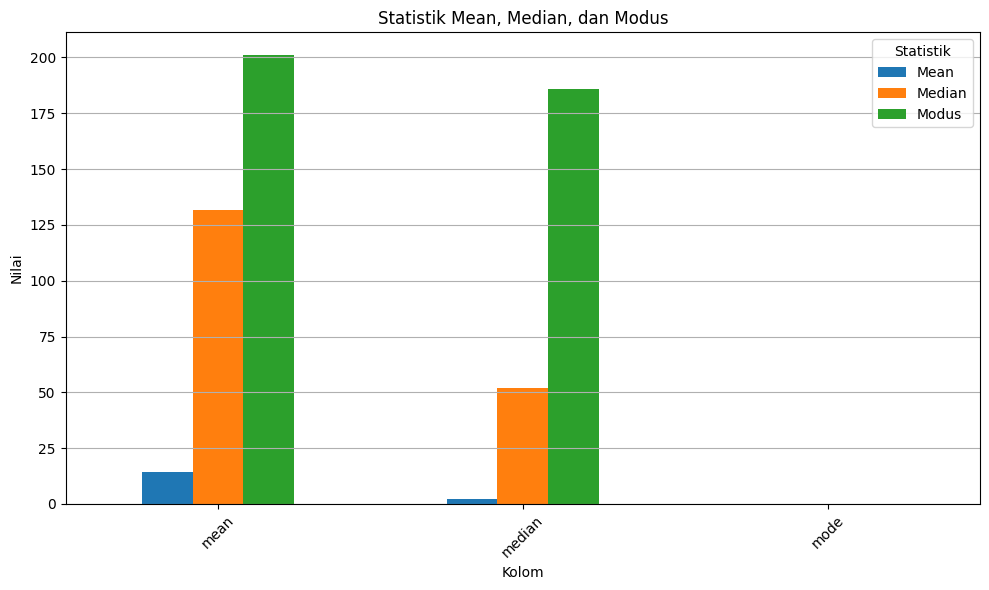

In [13]:
# Visualisasi
df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Statistik Mean, Median, dan Modus')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.legend(title='Statistik', labels=['Mean', 'Median', 'Modus'])
plt.grid(axis='y')

# Tampilkan visualisasi
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


### 3. 